In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [4]:
df = pd.read_csv('usefulness.csv')
display(df.T)

np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
adjRateConst,0.997644,0.114559,0.056536,0.488607,0.392892,0.818574,0.571960,0.815837,0.321158,0.914229,...,0.467705,0.842784,0.045354,0.763022,0.741558,0.063848,0.151575,0.812019,0.332376,0.536472
sudoAdjRateConst,0.102367,0.628345,0.992390,0.510926,0.263524,0.170295,0.537096,0.346851,0.342927,0.987483,...,0.771734,0.544502,0.143518,0.319389,0.360374,0.332468,0.962859,0.344046,0.940389,0.228241
meldRateConst,0.819615,0.377526,0.304138,0.233592,0.386808,0.147701,0.264765,0.431220,0.994575,0.032127,...,0.677755,0.786103,0.724481,0.747737,0.454969,0.268478,0.138126,0.129916,0.255699,0.146682
discardedAdjCardsConst,0.008790,0.267758,0.431739,0.105788,0.335210,0.962798,0.595812,0.391768,0.830222,0.454709,...,0.517775,0.729516,0.598441,0.672518,0.888030,0.822702,0.378834,0.491785,0.442403,0.924688
discardedSudoAdjConst,0.585377,0.378736,0.012536,0.223344,0.508988,0.882007,0.943166,0.353987,0.521868,0.326909,...,0.678870,0.899028,0.816321,0.769090,0.681720,0.628862,0.260251,0.125968,0.411431,0.634861
is_game_winner,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# features for regression input
f =  ["adjRateConst","sudoAdjRateConst","meldRateConst","discardedAdjCardsConst","discardedSudoAdjConst"]
# feature for regression output
g = "is_game_winner"

# feature for dependent plot
var = "adjRateConst"


print("\n".join(f"**{el}**" if el == var else el for el in f))
print("-------")
print(g)

**adjRateConst**
sudoAdjRateConst
meldRateConst
discardedAdjCardsConst
discardedSudoAdjConst
-------
is_game_winner


# Linear

CSV LINE:

0.4527626122,-0.0108442784,0.0084794260,0.0297949327,0.0066868827,0.0069870809 


R^2:   0.00038333504203891255 




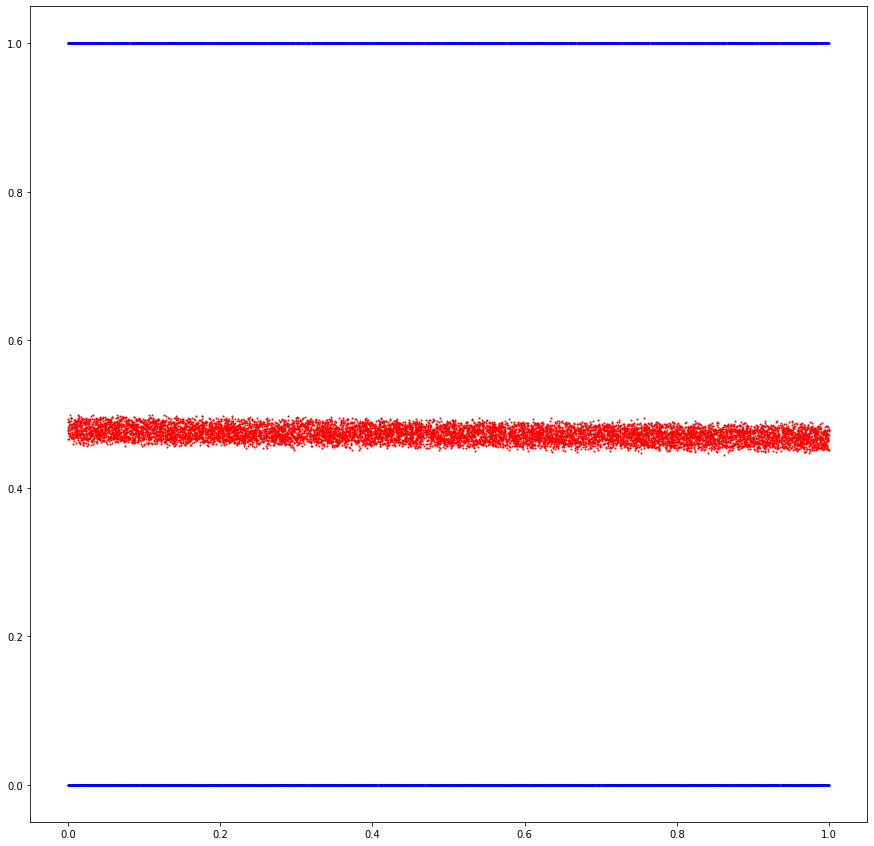

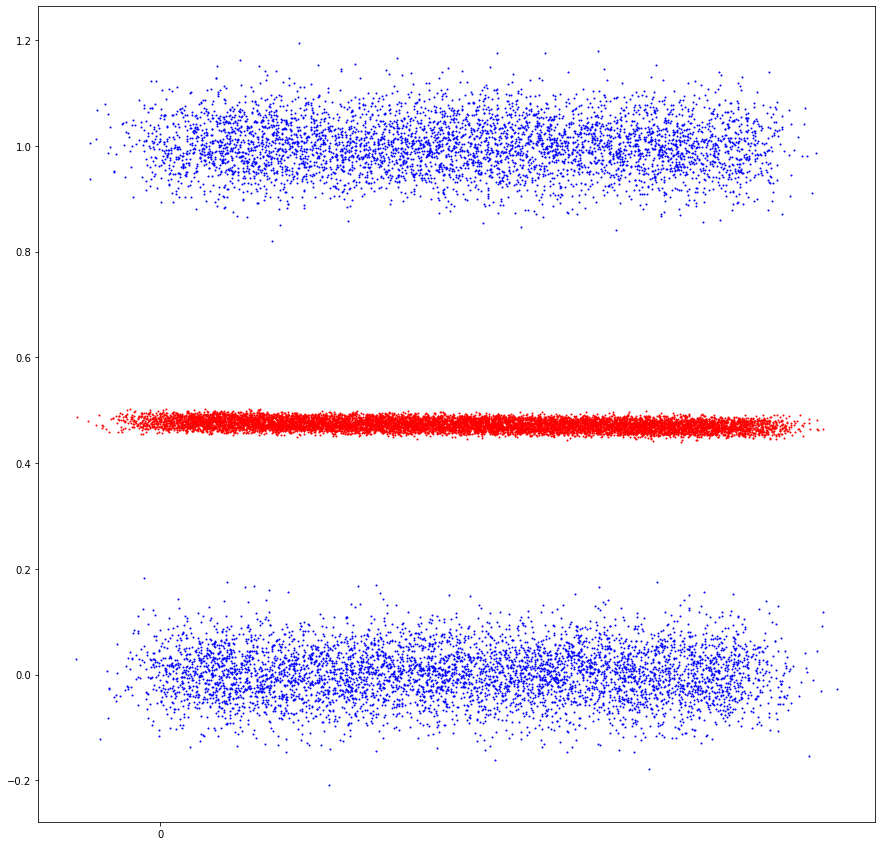

In [8]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(f)):
    if f[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(f[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.05 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()